# Analysis 1

Compare the outcomes of the elections for random and honest voters and candidates, with agents distributed uniformly in the opinion space.

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd ..

/Users/ingaschoyen/NatComp/project/src


/Users/ingaschoyen/miniforge3/envs/NatComp/lib/python3.13/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
from population import Population
from simulation import Simulation
from plotting import *
from geometry import *
from election import Election
import copy

from agents import Voter, Candidate, System, Strategy, Approach

### Functions

Some example functions to show how to extract data from the simulation.



In [34]:
def plot_stats(ax: plt.Axes, res: list, n_sims: int, n_rounds: int, pop_name: str):
    vse_comp, vse_util, vse_vdist_comp, norm_entropy = np.zeros((n_sims, n_rounds)), np.zeros((n_sims, n_rounds)), np.zeros((n_sims, n_rounds)), np.zeros((n_sims, n_rounds))
    for j, results in enumerate(res):
        vse_comp[j, :] = np.reshape([r.get('vse_comp')  for r in results], (1, n_rounds))
        vse_util[j, :] = np.reshape([r.get('vse_util') for r in results], (1, n_rounds))
        vse_vdist_comp[j, :] = np.reshape([r.get('vse_vdist_comp') for r in results], (1, n_rounds))
        norm_entropy = np.reshape([r.get('norm_entropy') for r in results], (1, n_rounds))
    # average over simulations 
    vse_comp_mean = np.mean(vse_comp, axis=0)
    vse_util_mean = np.mean(vse_util, axis=0)
    vse_vdist_comp_mean = np.mean(vse_vdist_comp, axis=0)
    norm_entropy_mean = np.mean(norm_entropy, axis=0)
    # get std
    vse_comp_std = np.std(vse_comp, axis=0)
    vse_util_std = np.std(vse_util, axis=0)
    vse_vdist_comp_std = np.std(vse_vdist_comp, axis=0)
    norm_entropy_std = np.std(norm_entropy, axis=0)
    # plot results

    ax.plot(vse_comp_mean, label='VSE Comp', color='blue')
    ax.fill_between(range(n_rounds), vse_comp_mean - vse_comp_std, vse_comp_mean + vse_comp_std, color='blue', alpha=0.2)
    ax.plot(vse_util_mean, label='VSE Util', color='orange')
    ax.fill_between(range(n_rounds), vse_util_mean - vse_util_std, vse_util_mean + vse_util_std, color='orange', alpha=0.2)
    ax.plot(vse_vdist_comp_mean, label='VSE VDist Comp', color='green')
    ax.fill_between(range(n_rounds), vse_vdist_comp_mean - vse_vdist_comp_std, vse_vdist_comp_mean + vse_vdist_comp_std, color='green', alpha=0.2)
    ax.plot(norm_entropy_mean, label='Norm Entropy', color='red')
    ax.fill_between(range(n_rounds), norm_entropy_mean - norm_entropy_std, norm_entropy_mean + norm_entropy_std, color='red', alpha=0.2)
    ax.set_title(f'Simulation Results for {pop_name}')
    ax.set_xlabel('Round')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid()

def plot_dynamics(ax: plt.Axes, sim_res: list, pop_name: str):
    rounds = len(sim_res)
    results = [result['votes_per'] for result in sim_res]
    cand_results = np.reshape(results[:], (rounds, len(results[0])))

    prev = 0
    for i in range(len(results[0])):
        ax.fill_between(range(rounds), prev, prev+cand_results[:, i], label=f'Candidate {i+1}', color=COLOURS[i % len(COLOURS)], alpha=0.5)
        prev += cand_results[:, i]

    ax.set_xlabel('Round')
    ax.set_ylabel('Votes')
    ax.set_title(f'Vote Composition for {pop_name}')
    ax.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    ax.grid()

## Setup

```python

#### Hyperparams

In [4]:
n_sims = 9
n_rounds = 10

#### Model Parameters

In [ ]:
n_voters = 1000
n_cands = 10

params = {
    'voter_strategy': 'uniform',
    'candidate_approach': 'uniform',
    'n_rounds': n_rounds,
}

#### Set up population of Uniform Random Voters & Random Candidates

In [6]:
votersR = [Voter(coords=[np.random.uniform(-1, 1, size=2)], id=i, strat=Strategy.RANDOM, params=params) for i in range(n_voters)]
votersH = [Voter(coords=[np.random.uniform(-1, 1, size=2)], id=i, strat=Strategy.HONEST, params=params) for i in range(n_voters)]
candsR = [Candidate(coords=[float(np.random.uniform(-1, 1)) for _ in range(2)], id=i, approach=Approach.RANDOM) for i in range(n_cands)]
candsH = [Candidate(coords=[float(np.random.uniform(-1, 1)) for _ in range(2)], id=i, approach=Approach.HONEST) for i in range(n_cands)]

##### Set up populations

In [ ]:
pop1 = Population(voters=votersR, candidates=candsR, params=params)
pop2 = Population(voters=votersH, candidates=candsR, params=params)
pop3 = Population(voters=votersR, candidates=candsH, params=params)
pop4 = Population(voters=votersH, candidates=candsH, params=params)

pop_names = ['RANDOM_VxRANDOM_C',
             'HONEST_VxRANDOM_C',
             'RANDOM_VxHONEST_C',
             'HONEST_VxHONEST_C']


## Run Simulations

### FPTP

In [ ]:

res1_FPTP = []
res2_FPTP = []
res3_FPTP = []
res4_FPTP = []
for i in range(n_sims):
    pop1_int, pop2_int, pop3_int, pop4_int = copy.copy(pop1), copy.copy(pop2), copy.copy(pop3), copy.copy(pop4)
    sim1 = Simulation(population = pop1_int, election=Election(population = pop1_int, params={'system': System.FPTP}))
    sim2 = Simulation(population = pop2_int, election=Election(population = pop2_int, params={'system': System.FPTP}))
    sim3 = Simulation(population = pop3_int, election=Election(population = pop3_int, params={'system': System.FPTP}))
    sim4 = Simulation(population = pop4_int, election=Election(population = pop4_int, params={'system': System.FPTP}))
    
    output1 = sim1.run_election_cycles(save_results=False, plot_results=False, make_gif=True, verbose=False)
    output2 = sim2.run_election_cycles(save_results=False, plot_results=False, make_gif=True, verbose=False)
    output3 = sim3.run_election_cycles(save_results=False, plot_results=False, make_gif=True, verbose=False)
    output4 = sim4.run_election_cycles(save_results=False, plot_results=False, make_gif=True, verbose=False)
    print(f"Simulation {i+1} completed.")
    res1_FPTP.append(output1.get('results'))
    res2_FPTP.append(output2.get('results'))
    res3_FPTP.append(output3.get('results'))
    res4_FPTP.append(output4.get('results'))

results_FPTP = [res1_FPTP, res2_FPTP, res3_FPTP, res4_FPTP]


Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Running round 1/10


/Users/ingaschoyen/NatComp/project/src/simulation.py:80: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Running round 2/10
Running round 3/10
Running round 4/10
Running round 5/10
Running round 6/10
Running round 7/10
Running round 8/10
Running round 9/10
Running round 10/10
Election simulation completed.
Running round 1/10
Running round 2/10
Running round 3/10
Running round 4/10
Running round 5/10
Running round 6/10
Running round 7/10
Running round 8/10
Running round 9/10
Running round 10/10
Election simulation completed.
Running round 1/10
Running round 2/10
Running round 3/10
Running round 4/10
Running round 5/10
Running round 6/10
Running round 7/10
Running round 8/10
Running round 9/10
Running round 10/10
Election simulation completed.
Running round 1/10
Running round 2/10
Running round 3/10
Running round 4/10
Running round 5/10
Running round 6/10
Running round 7/10
Running round 8/10
Running round 9/10
Running round 10/10
Election simulation completed.
Simulation 1 completed.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 po

#### Plotting

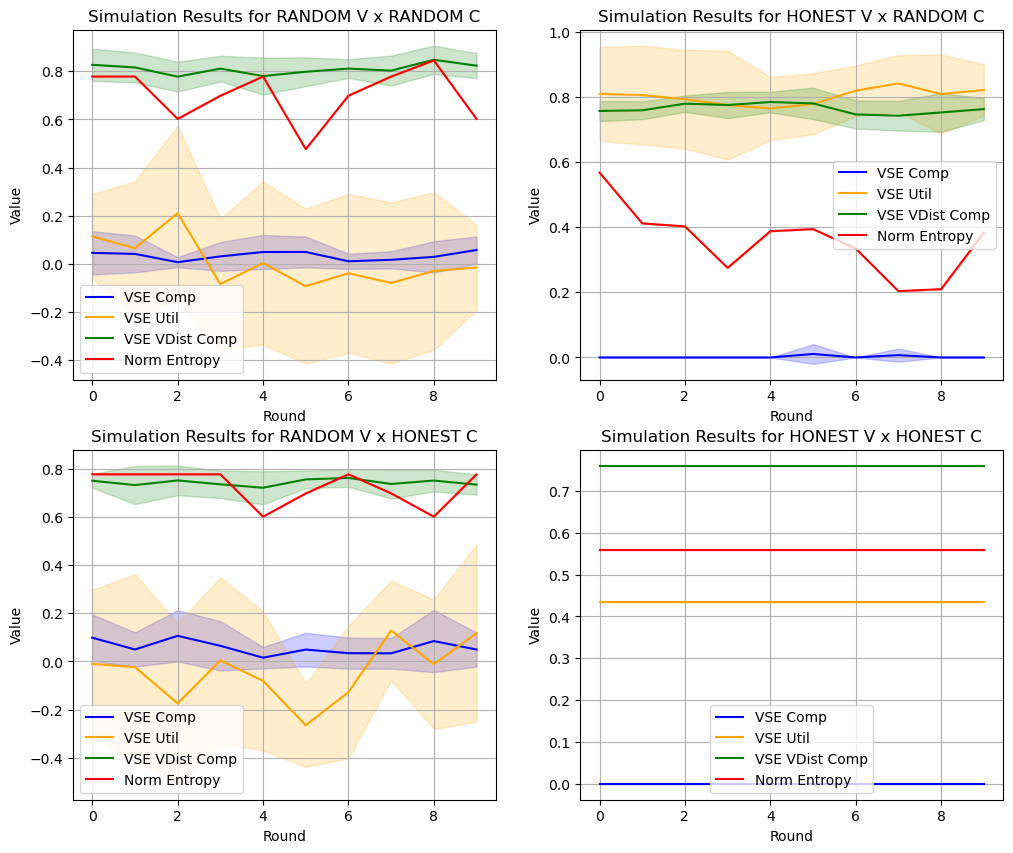

In [ ]:
# extract stats and plot results
fig1, axs1 = plt.subplots(2, 2, figsize=(12, 10))
fig2, axs2 = plt.subplots(2, 2, figsize=(12, 10))
for i, res in enumerate(results_FPTP):
    plot_stats(axs1[i // 2, i % 2], res, n_sims, n_rounds, pop_names[i])
    plot_dynamics(axs2[i // 2, i % 2], res, pop_names[i])
fig1.suptitle(f'First-Past-The-Post n={n_voters}, c={n_cands}, r={n_rounds}')
fig2.suptitle(f'First-Past-The-Post n={n_voters}, c={n_cands}, r={n_rounds}')
fig1.savefig('./plots/anal1a/stats_FPTP.png')
fig2.savefig('./plots/anal1a/dynamics_FPTP.png')


#### Clear sim objects

In [ ]:
del pop1_int, pop2_int, pop3_int, pop4_int
del sim1, sim2, sim3, sim4
del output1, output2, output3, output4

### Instant Runoff

In [16]:

res1_IR = []
res2_IR = []
res3_IR = []
res4_IR = []
for i in range(n_sims):
    pop1_int, pop2_int, pop3_int, pop4_int = copy.copy(pop1), copy.copy(pop2), copy.copy(pop3), copy.copy(pop4)
    sim1 = Simulation(population = pop1_int, election=Election(population = pop1_int, params={'system': System.INSTANT_RUNOFF}))
    sim2 = Simulation(population = pop2_int, election=Election(population = pop2_int, params={'system': System.INSTANT_RUNOFF}))
    sim3 = Simulation(population = pop3_int, election=Election(population = pop3_int, params={'system': System.INSTANT_RUNOFF}))
    sim4 = Simulation(population = pop4_int, election=Election(population = pop4_int, params={'system': System.INSTANT_RUNOFF}))
    
    output1 = sim1.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    output2 = sim2.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    output3 = sim3.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    output4 = sim4.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    print(f"Simulation {i+1} completed.")
    res1_IR.append(output1.get('results'))
    res2_IR.append(output2.get('results'))
    res3_IR.append(output3.get('results'))
    res4_IR.append(output4.get('results'))

results_IR = [res1_IR, res2_IR, res3_IR, res4_IR]

Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.


/Users/ingaschoyen/NatComp/project/src/simulation.py:80: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  gif_frames.append(frame_path)


Election simulation completed.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Simulation 1 completed.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Simulation 2 completed.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Simulation 3 completed.
Simulation initialized with 10 rounds and 5 polls per round.
Simulat

#### Plotting

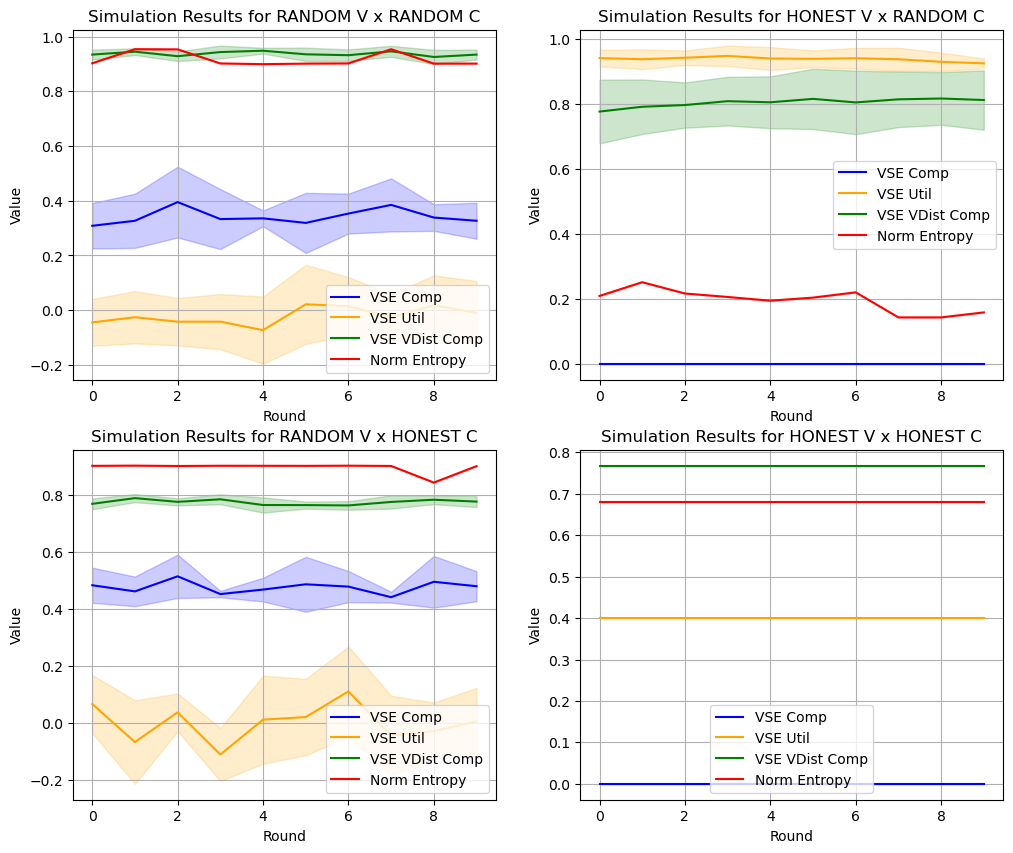

In [ ]:
# extract stats and plot results
fig1, axs1 = plt.subplots(2, 2, figsize=(12, 10))
fig2, axs2 = plt.subplots(2, 2, figsize=(12, 10))
for i, res in enumerate(results_IR):
    plot_stats(axs1[i // 2, i % 2], res, n_sims, n_rounds, pop_names[i])
    plot_dynamics(axs2[i // 2, i % 2], res, pop_names[i])

fig1.suptitle(f'Instant Runoff n={n_voters}, c={n_cands}, r={n_rounds}')
fig2.suptitle(f'Instant Runoff n={n_voters}, c={n_cands}, r={n_rounds}')
fig1.savefig(f'./plots/anal1a/stats_IR.png')
fig2.savefig(f'./plots/anal1a/dynamics_IR.png')



##### Clear memory of sim objects

In [18]:
del sim1, sim2, sim3, sim4, output1, output2, output3, output4, pop1_int, pop2_int, pop3_int, pop4_int, results

### Approval

In [20]:
res1_A = []
res2_A = []
res3_A = []
res4_A = []
for i in range(n_sims):
    pop1_int, pop2_int, pop3_int, pop4_int = copy.copy(pop1), copy.copy(pop2), copy.copy(pop3), copy.copy(pop4)
    sim1 = Simulation(population = pop1_int, election=Election(population = pop1_int, params={'system': System.APPROVAL}))
    sim2 = Simulation(population = pop2_int, election=Election(population = pop2_int, params={'system': System.APPROVAL}))
    sim3 = Simulation(population = pop3_int, election=Election(population = pop3_int, params={'system': System.APPROVAL}))
    sim4 = Simulation(population = pop4_int, election=Election(population = pop4_int, params={'system': System.APPROVAL}))
    
    output1 = sim1.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    output2 = sim2.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    output3 = sim3.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    output4 = sim4.run_election_cycles(save_results=False, plot_results=False, make_gif=(i==0), verbose=False)
    print(f"Simulation {i+1} completed.")
    res1_A.append(output1.get('results'))
    res2_A.append(output2.get('results'))
    res3_A.append(output3.get('results'))
    res4_A.append(output4.get('results'))

results_AP = [res1_A, res2_A, res3_A, res4_A]

Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.


/Users/ingaschoyen/NatComp/project/src/simulation.py:80: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  gif_frames.append(frame_path)


Election simulation completed.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Simulation 1 completed.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Simulation 2 completed.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Simulation initialized with 10 rounds and 5 polls per round.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Election simulation completed.
Simulation 3 completed.
Simulation initialized with 10 rounds and 5 polls per round.
Simulat

#### Plotting

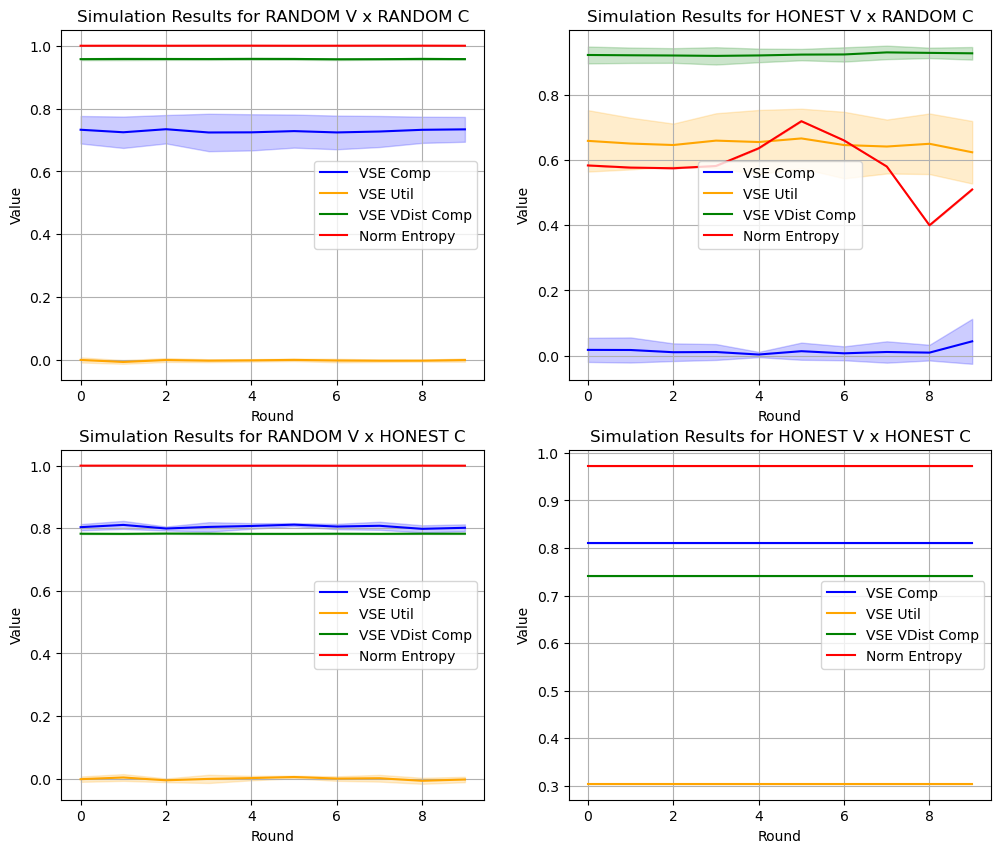

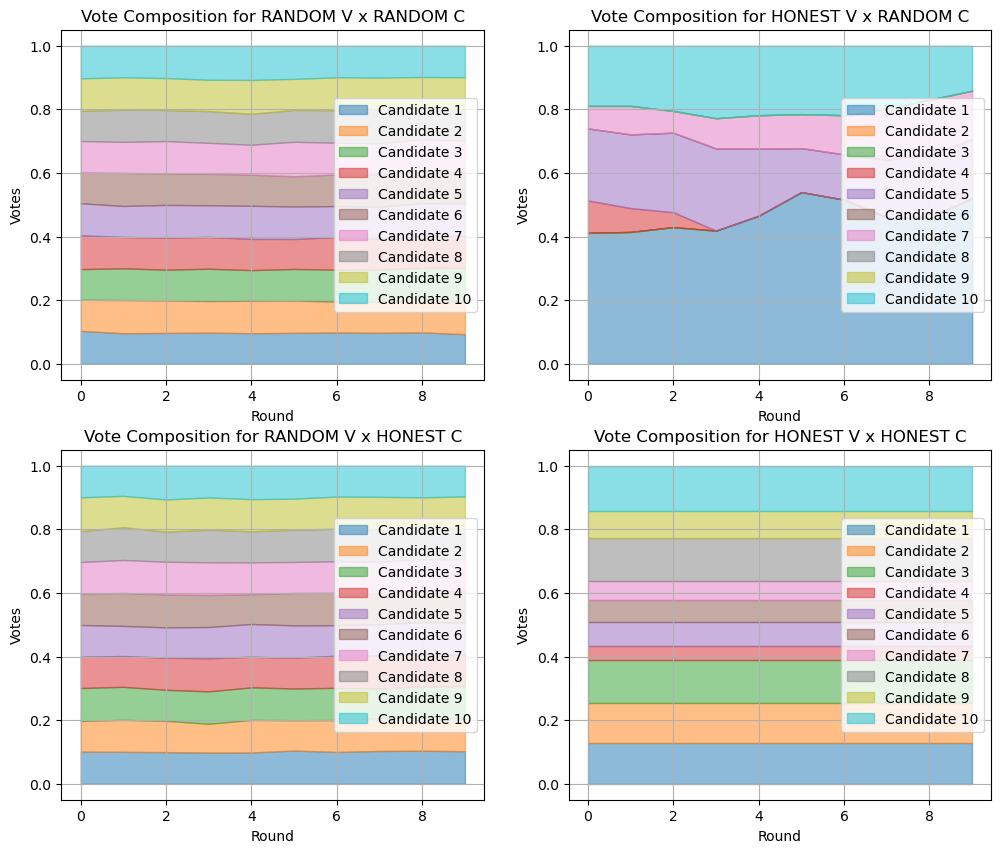

In [ ]:
# extract stats and plot results
fig1, axs1 = plt.subplots(2, 2, figsize=(12, 10))
fig2, axs2 = plt.subplots(2, 2, figsize=(12, 10))
for i, res in enumerate(results_AP):
    plot_stats(axs1[i // 2, i % 2], res, n_sims, n_rounds, pop_names[i])
    plot_dynamics(axs2[i // 2, i % 2], res[0], pop_names[i])

fig1.suptitle(f'Approval Voting n={n_voters}, c={n_cands}, r={n_rounds}')
fig2.suptitle(f'Approval Voting n={n_voters}, c={n_cands}, r={n_rounds}')
fig1.savefig(f'./plots/anal1a/results_stats_AP.png')
fig2.savefig(f'./plots/anal1a/results_dynamics_AP.png')
